In [129]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.svm import SVC

In [9]:
df = pd.read_csv('Data/train.csv')

In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Column Descriptions 
####  battery_power : Total energy a battery can store in one time measured in mAh
####  blue:  Has bluetooth or not             
####  clock_speed : speed at which microprocessor executes instructions     
####  dual_sim : Has dual sim support or not
####  fc : Front Camera mega pixels
####  four_g : Has 4G or not      
####  int_memory : Internal Memory in Gigabytes     
####  m_dep  : Mobile Depth in cm
####  mobile_wt :Weight of mobile phone     
####  n_cores : Number of cores of processor           
####  pc: Primary Camera mega pixels                 
#### px_height : Pixel Resolution Height          
#### px_width :Pixel Resolution Width        
####  ram : Random Access Memory in Megabytes              
####  sc_h: Screen Height of mobile in cm              
####  sc_w : Screen Width of mobile in cm              
####  talk_time : longest time that a single battery charge will last when you are        
####  three_g  : Has 3G or not          
####  touch_screen: Has touch screen or not       
####  wifi: Has wifi or not               
####  price_range :  This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [14]:
print ( "Number of rows:" ,df.shape[0])
print ( "Number of Columns:",df.shape[1] )

Number of rows: 2000
Number of Columns: 21


## Exploratory Data Analysis 

In [24]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [17]:
# Checking for Null values 
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [20]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [32]:
# Checking the Counts, Null values, % of Nulls and Cardamility
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
battery_power,2000,0,0.0,1094
blue,2000,0,0.0,2
clock_speed,2000,0,0.0,26
dual_sim,2000,0,0.0,2
fc,2000,0,0.0,20
four_g,2000,0,0.0,2
int_memory,2000,0,0.0,63
m_dep,2000,0,0.0,10
mobile_wt,2000,0,0.0,121
n_cores,2000,0,0.0,8


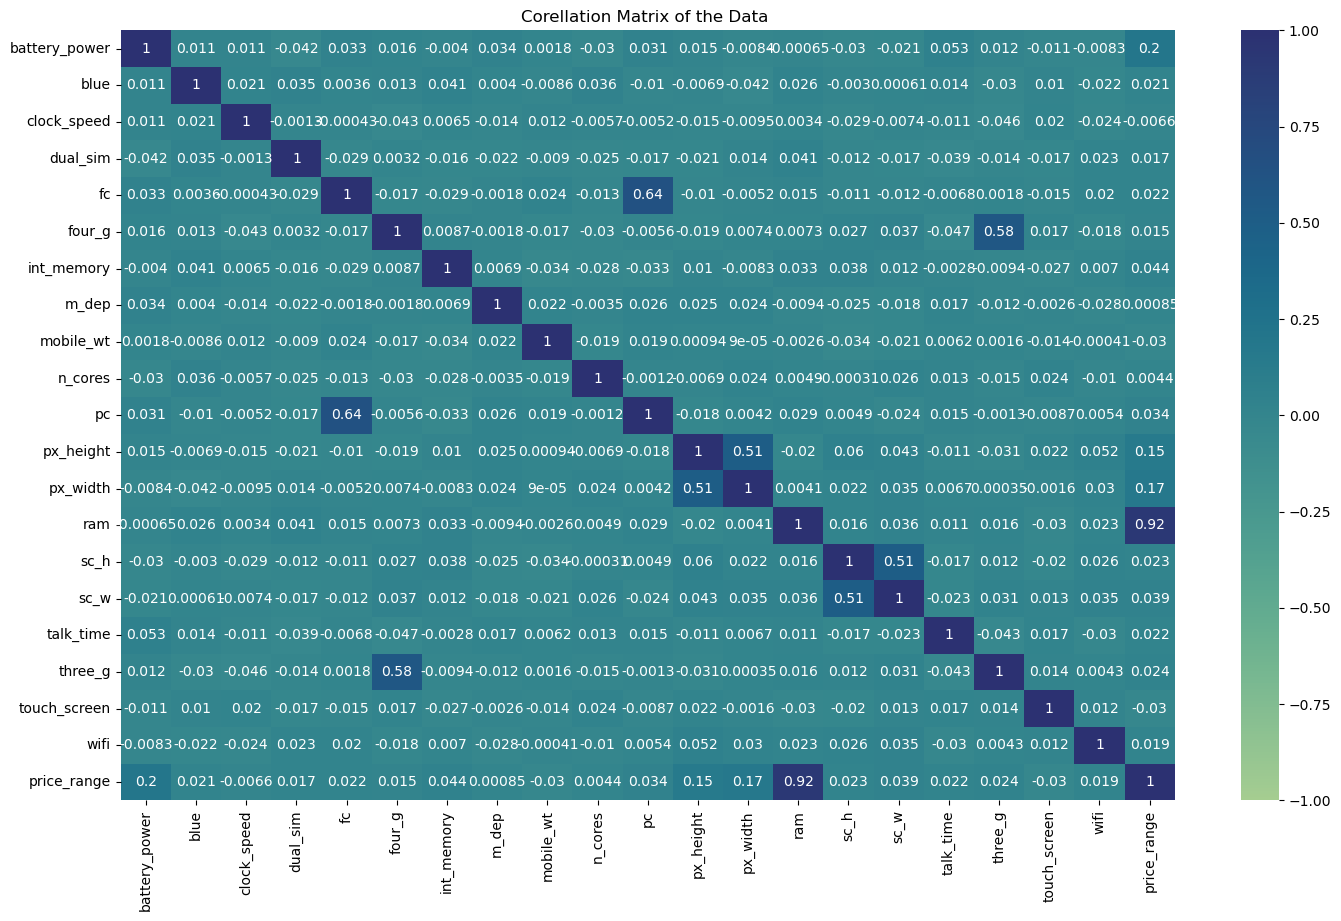

In [57]:
# Corellation matrix 
correlation  = df.corr()
ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(correlation , vmin=-1, vmax=1 , annot=True ,cmap = "crest")
plt.title("Corellation Matrix of the Data ")
# Display the plot
plt.show()

In [45]:
# Ram, Battery power, height and width have high corelaltion with price range.


### Visualizing Features 

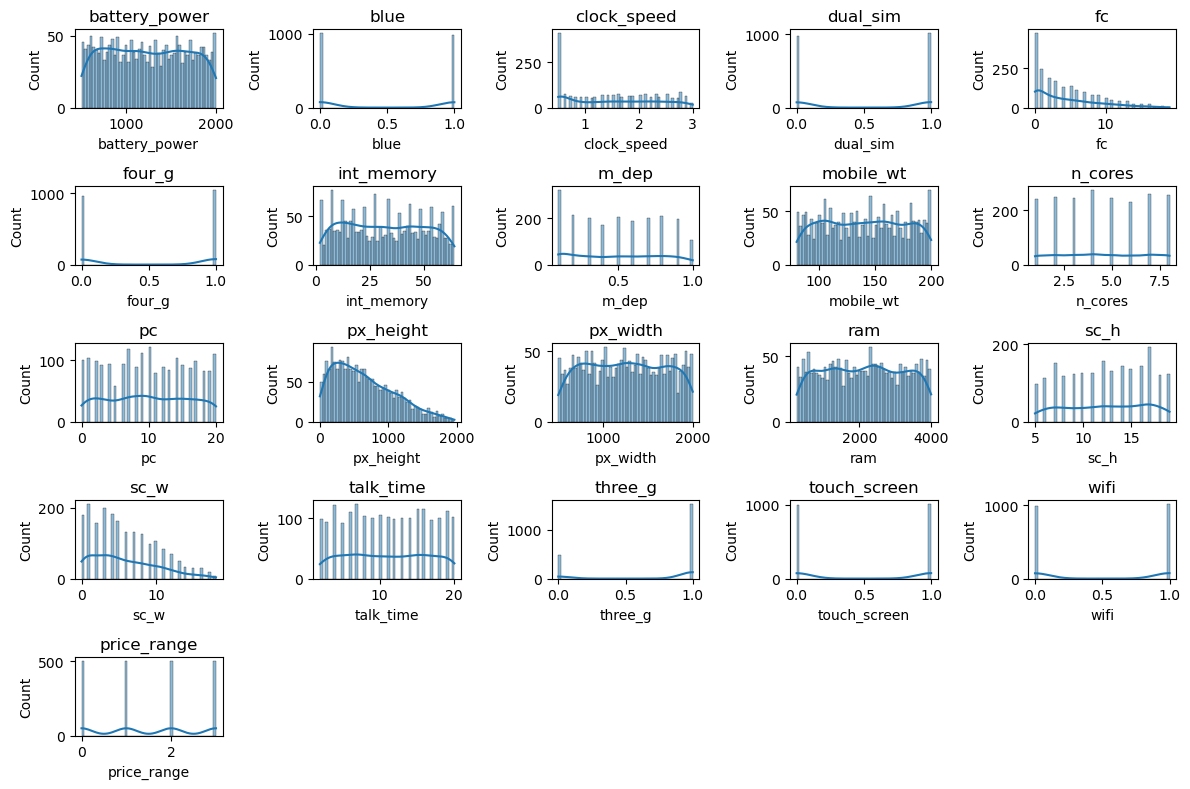

In [104]:
# Sub plots of all columns
plt.figure(figsize=(12, 8))
for feature in df.columns.tolist():
    plt.subplot(5, 5, df.columns.tolist().index(feature)+1) 
    sns.histplot(data=df[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

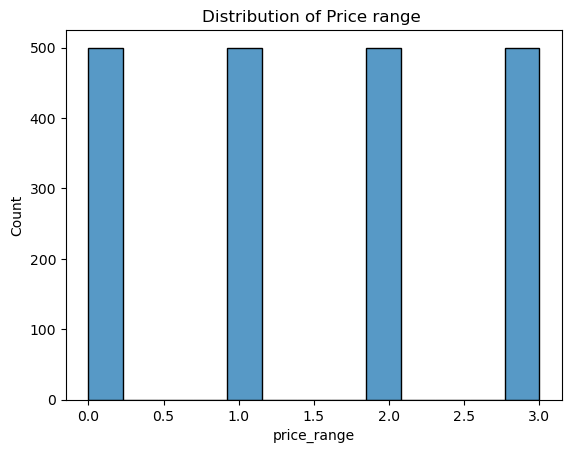

In [55]:
# lets viaualize price range 
sns.histplot(data = df, x='price_range')
plt.title("Distribution of Price range ")
# Display the plot
plt.show()


<Axes: xlabel='battery_power', ylabel='Density'>

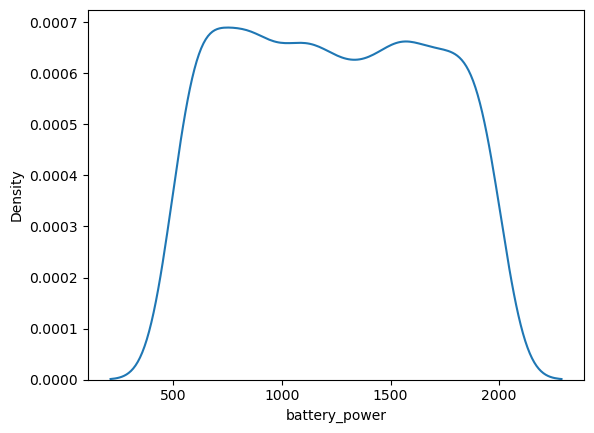

In [85]:
## Kernel density of Battery power
sns.kdeplot(df.battery_power)

In [51]:
# grouping the mean of batter power to price range as there are large cardanility for battery power. 
df_price_battery = df.groupby('price_range')['battery_power'].mean()
print(df_price_battery)   

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64


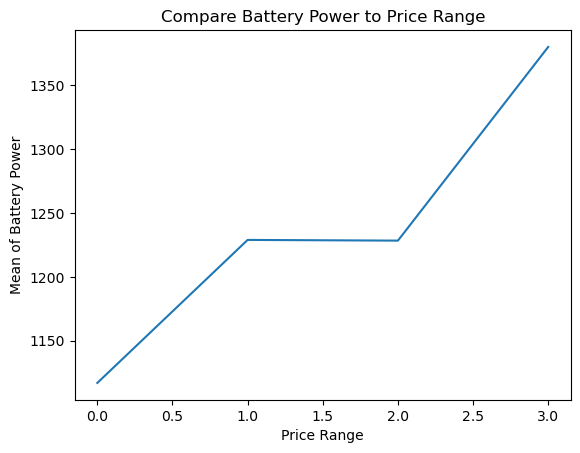

In [54]:
# plottting the relationship between Price range and Battery power
fig = sns.lineplot(df_price_battery)
plt.xlabel("Price Range")
plt.ylabel("Mean of Battery Power")
plt.title("Compare Battery Power to Price Range")
# Display the plot
plt.show()

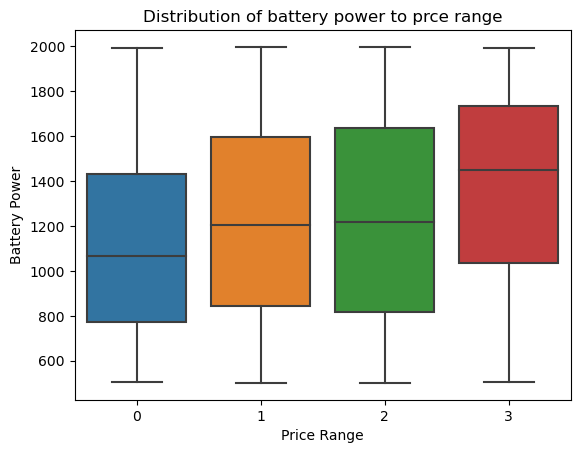

In [63]:
#boxplot of the distribution of battery power by price range.
sns.boxplot(data = df, x = 'price_range', y = 'battery_power')
plt.xlabel("Price Range")
plt.ylabel("Battery Power")
plt.title("Distribution of battery power to Price Range")
# Display the plot
plt.show()

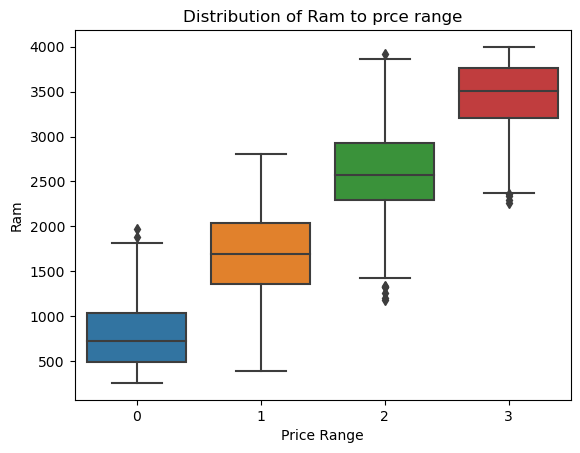

In [82]:
#box plot of Ram with refrence to price range
sns.boxplot(data = df, x = 'price_range', y = 'ram')
plt.xlabel("Price Range")
plt.ylabel("Ram")
plt.title("Distribution of Ram to Price range")
# Display the plot
plt.show()

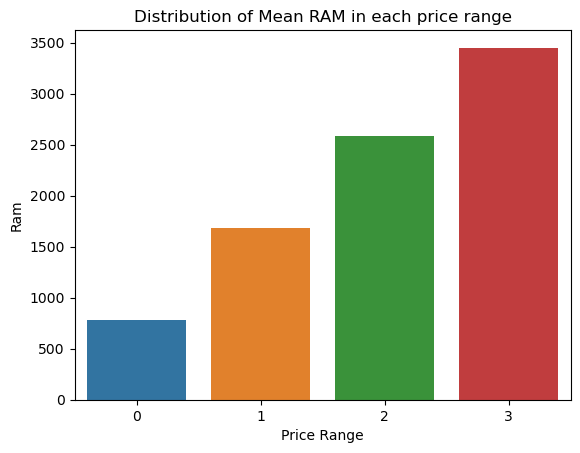

In [87]:
#Visualising the mean of Ram in bar chart
df_price_ram = df.groupby('price_range')['ram'].mean()
sns.barplot(x = df_price_ram.index,  y = df_price_ram.values)
plt.xlabel("Price Range")
plt.ylabel("Ram")
plt.title("Distribution of Mean RAM in each price range")
# Display the plot
plt.show()

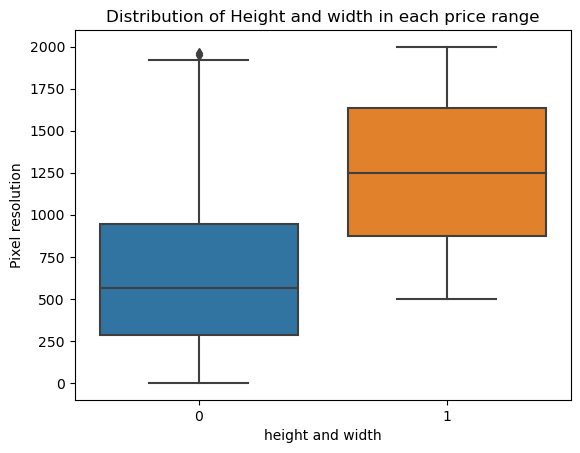

In [162]:
# Box plot distribution of 
sns.boxplot(data = [df.px_height , df.px_width])
plt.xlabel("height and width")
plt.ylabel("Pixel resolution")
plt.title("Distribution of Height and width in each price range")
# Display the plot
plt.show()

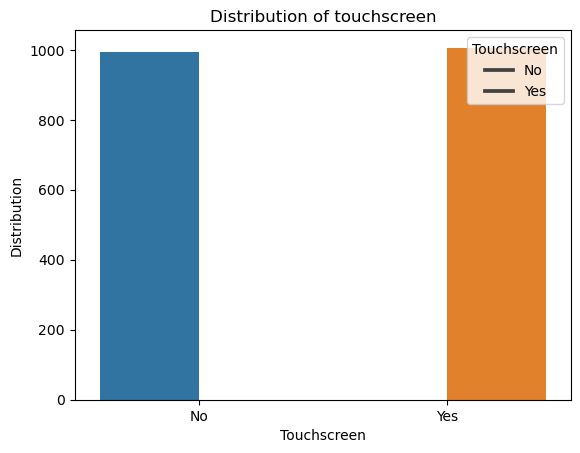

In [122]:
# Plotting touchscreen yes vs no

touchscreen_mapping = {'0': 'No', '1': 'Yes'}

sns.barplot(x=  df.touch_screen.value_counts().index, y = df.touch_screen.value_counts().values, hue = df.touch_screen.value_counts().index )
plt.xlabel("Touchscreen")
plt.ylabel("Distribution")
plt.title("Distribution of touchscreen")
plt.gca().set_xticklabels([touchscreen_mapping[label.get_text()] for label in plt.gca().get_xticklabels()])
plt.legend(title='Touchscreen', labels=[touchscreen_mapping[label.get_text()] for label in plt.gca().get_legend().get_texts()], loc='upper right')
# Display the plot
plt.show()

#### Now we have completed the VIsualization phase and the data seems to be in order for us to porceed to modelling

## Modelling 

In [124]:
#Splitting the X and y parameters
# We are selecting only the most relevant features from the corellation matrix 
X = df[["ram" , "px_height" , "px_width" ,"battery_power" ]]
y = df.price_range

In [125]:
# Splitting the data into training and validation sets
X_train,X_test , y_train , y_test = train_test_split(X,y, test_size=  0.15 , random_state = 42)


In [130]:
# lets test linear regression model 
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_train,y_train)

0.9156183853767335

In [137]:
# lets check predictions score 
y_preds = linreg.predict(X_test)
y_preds = [ round(value) for value in y_preds] # since we are predicting the label we need this step.


Text(95.72222222222221, 0.5, 'Truth')

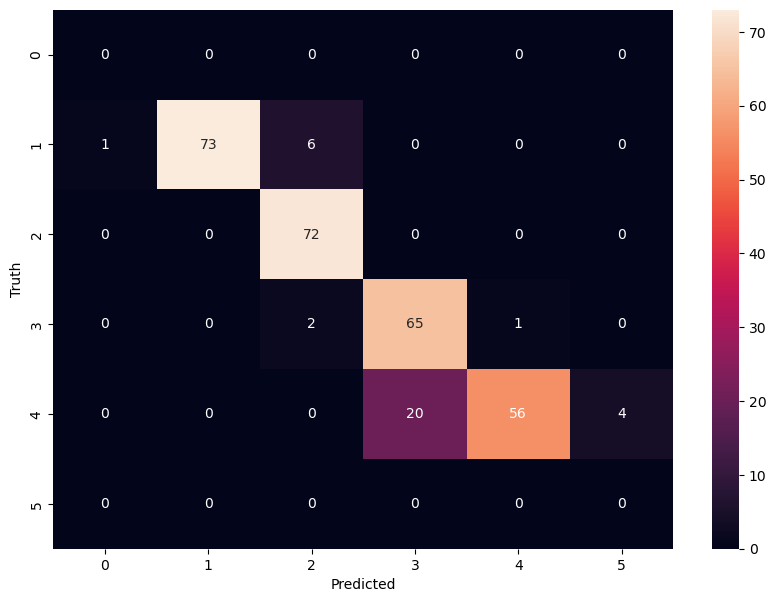

In [138]:
# lets construct a confusion matrix 
cm = confusion_matrix(y_test, y_preds) 
cm
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [139]:
y_test.value_counts()

0    80
3    80
1    72
2    68
Name: price_range, dtype: int64

In [142]:
set(y_preds)

{-1, 0, 1, 2, 3, 4}

In [143]:
# We are seeing that there is high accuracy with lieanr regression but its predicting new labels as well. 
#Lets pivot to see this as classification problem

In [144]:
model_params = {
    'svm':{
        'model' : SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [147]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [148]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,svm,0.954118,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.900000,{'n_estimators': 10}
2,logistic_regression,0.830588,{'C': 10}


In [149]:
# let us examine the best models in more detail

Train accuracy: 0.9752941176470589
Test accuracy: 0.9633333333333334


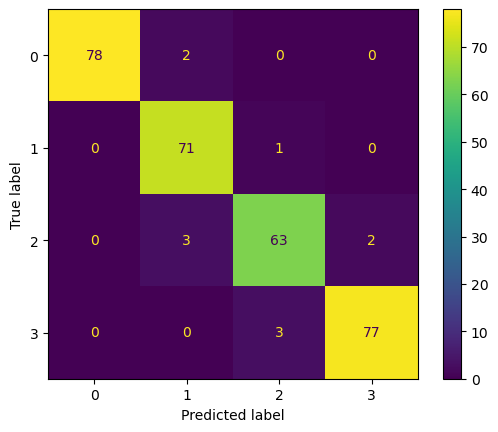

In [152]:
model_svm = SVC(kernel='rbf',C=20)
model_svm.fit(X_train,y_train)
score_svm_train = model_svm.score(X_train,y_train)
print(f"Train accuracy: {score_svm_train}")

X_test = scaler.fit_transform(X_test)

score_svm_test = model_svm.score(X_test,y_test)
print(f"Test accuracy: {score_svm_test}")

ConfusionMatrixDisplay.from_estimator(model_svm,
                                      X_test,
                                      y_test);

In [153]:
# Logistic regression

Train accuracy: 0.9582352941176471
Test accuracy: 0.97


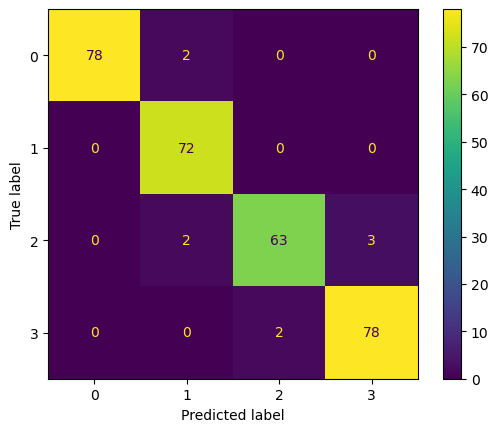

In [155]:
model_LR = LogisticRegression(C=10)
model_LR.fit(X_train,y_train)

score_LR_train = model_LR.score(X_train,y_train)
print(f"Train accuracy: {score_LR_train}")

score_LR_test = model_LR.score(X_test,y_test)
print(f"Test accuracy: {score_LR_test}")

ConfusionMatrixDisplay.from_estimator(model_LR,
                                      X_test,
                                      y_test);

Train accuracy: 0.9947058823529412
Test accuracy: 0.91


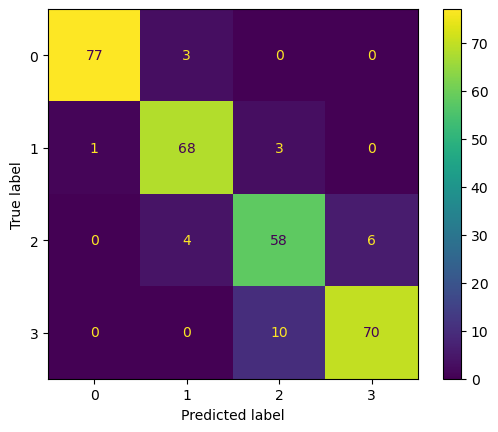

In [157]:
# Random forest classifier 
model_RFC = RandomForestClassifier(n_estimators=10,random_state=42)
model_RFC.fit(X_train,y_train)

score_RFC_train = model_RFC.score(X_train,y_train)
print(f"Train accuracy: {score_RFC_train}")


score_RFC_test = model_RFC.score(X_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

ConfusionMatrixDisplay.from_estimator(model_RFC,
                                      X_test,
                                      y_test);

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions on the testing set
gb_predictions = gb_model.predict(X_test)
    

In [161]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, gb_predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, gb_predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, gb_predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, gb_predictions)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.21185428048019964
Mean Squared Error (MSE): 0.07564890518614026
Root Mean Squared Error (RMSE): 0.27504346054058487
R-squared (R2) Score: 0.9425431958314827
